In [1]:
import pandas as pd

URL_DATA = 'https://storage.googleapis.com/dosm-public-economy/cpi.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

df.head()

,date,overall,core_overall,food_beverage,alcohol_tobacco,clothing_footwear,housing_utilities,furnishings,health,transport,...,core_clothing_footwear,core_housing_utilities,core_furnishings,core_health,core_transport,core_communication,core_recreation_culture,core_education,core_hospitality,core_misc
0,2010-01-01,99.4,0.0,99.0,98.3,101.2,99.4,100.0,99.4,98.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-02-01,99.4,0.0,99.0,98.3,100.1,99.6,99.9,99.4,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-03-01,99.4,0.0,99.0,98.4,100.0,99.6,100.0,99.3,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-04-01,99.4,0.0,99.1,98.4,100.5,99.6,100.0,99.7,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-05-01,99.6,0.0,99.5,98.4,100.3,99.8,99.1,99.8,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Import needed library***

In [2]:
import matplotlib as plt
import seaborn as sns
import numpy as np
import statsmodels as st
import matplotlib.pyplot as plt
from matplotlib.pyplot import axes
from sklearn import metrics
from sklearn.linear_model import LinearRegression

***Data cleaning, grouping by year and calculating the mean***

In [3]:
df_new = df[["date", "overall", "food_beverage", "clothing_footwear", "furnishings", "housing_utilities", "recreation_culture", "hospitality", "alcohol_tobacco", "health", "transport", "communication", "education", "misc"]].copy()

In [4]:
df_new["date"] = df_new.date.astype(str)
df_new[["year", "month", "day"]] = df_new["date"].str.split("-", expand = True)
df_new = df_new.groupby(['year']).mean()
df_new.head()

,overall,food_beverage,clothing_footwear,furnishings,housing_utilities,recreation_culture,hospitality,alcohol_tobacco,health,transport,communication,education,misc
year,,,,,,,,,,,,,
2010,100.016667,99.991667,100.008333,99.941667,100.008333,99.983333,100.000000,100.000000,100.016667,100.016667,100.008333,100.000000,100.016667
2011,103.191667,104.800000,99.758333,101.758333,101.775000,101.966667,105.866667,104.608333,102.733333,104.416667,99.725000,102.233333,102.416667
2012,104.908333,107.616667,99.191667,103.783333,103.391667,103.175000,109.008333,105.025000,104.816667,105.141667,99.083333,104.683333,104.400000
2013,107.116667,111.450000,98.616667,105.425000,105.233333,103.266667,111.666667,111.283333,106.816667,107.241667,98.416667,107.225000,104.716667
2014,110.483333,115.175000,98.425000,106.533333,108.800000,104.933333,116.850000,124.216667,109.883333,112.400000,97.725000,109.750000,105.350000


***Finding correlation***

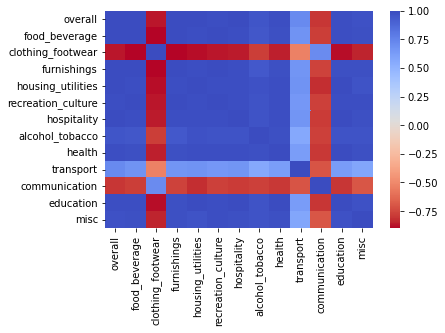

In [5]:
corr = df_new.corr()
sns.heatmap(corr, cmap="coolwarm_r", annot_kws={'size':20})

In [6]:
(corr.replace(to_replace={ 1 : 0 }).drop('overall', axis = 1).drop('overall', axis = 0).style.highlight_max(color="#356518").highlight_min(color="#A5191E"))

,food_beverage,clothing_footwear,furnishings,housing_utilities,recreation_culture,hospitality,alcohol_tobacco,health,transport,communication,education,misc
food_beverage,0.000000,-0.898406,0.998608,0.989070,0.993087,0.992216,0.948649,0.984248,0.675553,-0.775512,0.989551,0.981170
clothing_footwear,-0.898406,0.000000,-0.895085,-0.876826,-0.861838,-0.854834,-0.776843,-0.852252,-0.533149,0.713497,-0.877987,-0.839442
furnishings,0.998608,-0.895085,0.000000,0.985931,0.993134,0.988333,0.946230,0.980393,0.672045,-0.759195,0.984702,0.983275
housing_utilities,0.989070,-0.876826,0.985931,0.000000,0.987385,0.991424,0.970874,0.992560,0.678981,-0.817734,0.992817,0.966873
recreation_culture,0.993087,-0.861838,0.993134,0.987385,0.000000,0.990876,0.968189,0.989120,0.657192,-0.768947,0.986147,0.989853
hospitality,0.992216,-0.854834,0.988333,0.991424,0.990876,0.000000,0.965218,0.992032,0.671032,-0.787053,0.994766,0.980729
alcohol_tobacco,0.948649,-0.776843,0.946230,0.970874,0.968189,0.965218,0.000000,0.983166,0.566245,-0.767486,0.968120,0.963056
health,0.984248,-0.852252,0.980393,0.992560,0.989120,0.992032,0.983166,0.000000,0.628918,-0.787421,0.995874,0.981917
transport,0.675553,-0.533149,0.672045,0.678981,0.657192,0.671032,0.566245,0.628918,0.000000,-0.705547,0.635698,0.583949
communication,-0.775512,0.713497,-0.759195,-0.817734,-0.768947,-0.787053,-0.767486,-0.787421,-0.705547,0.000000,-0.799918,-0.696933


***Trend visualisation***

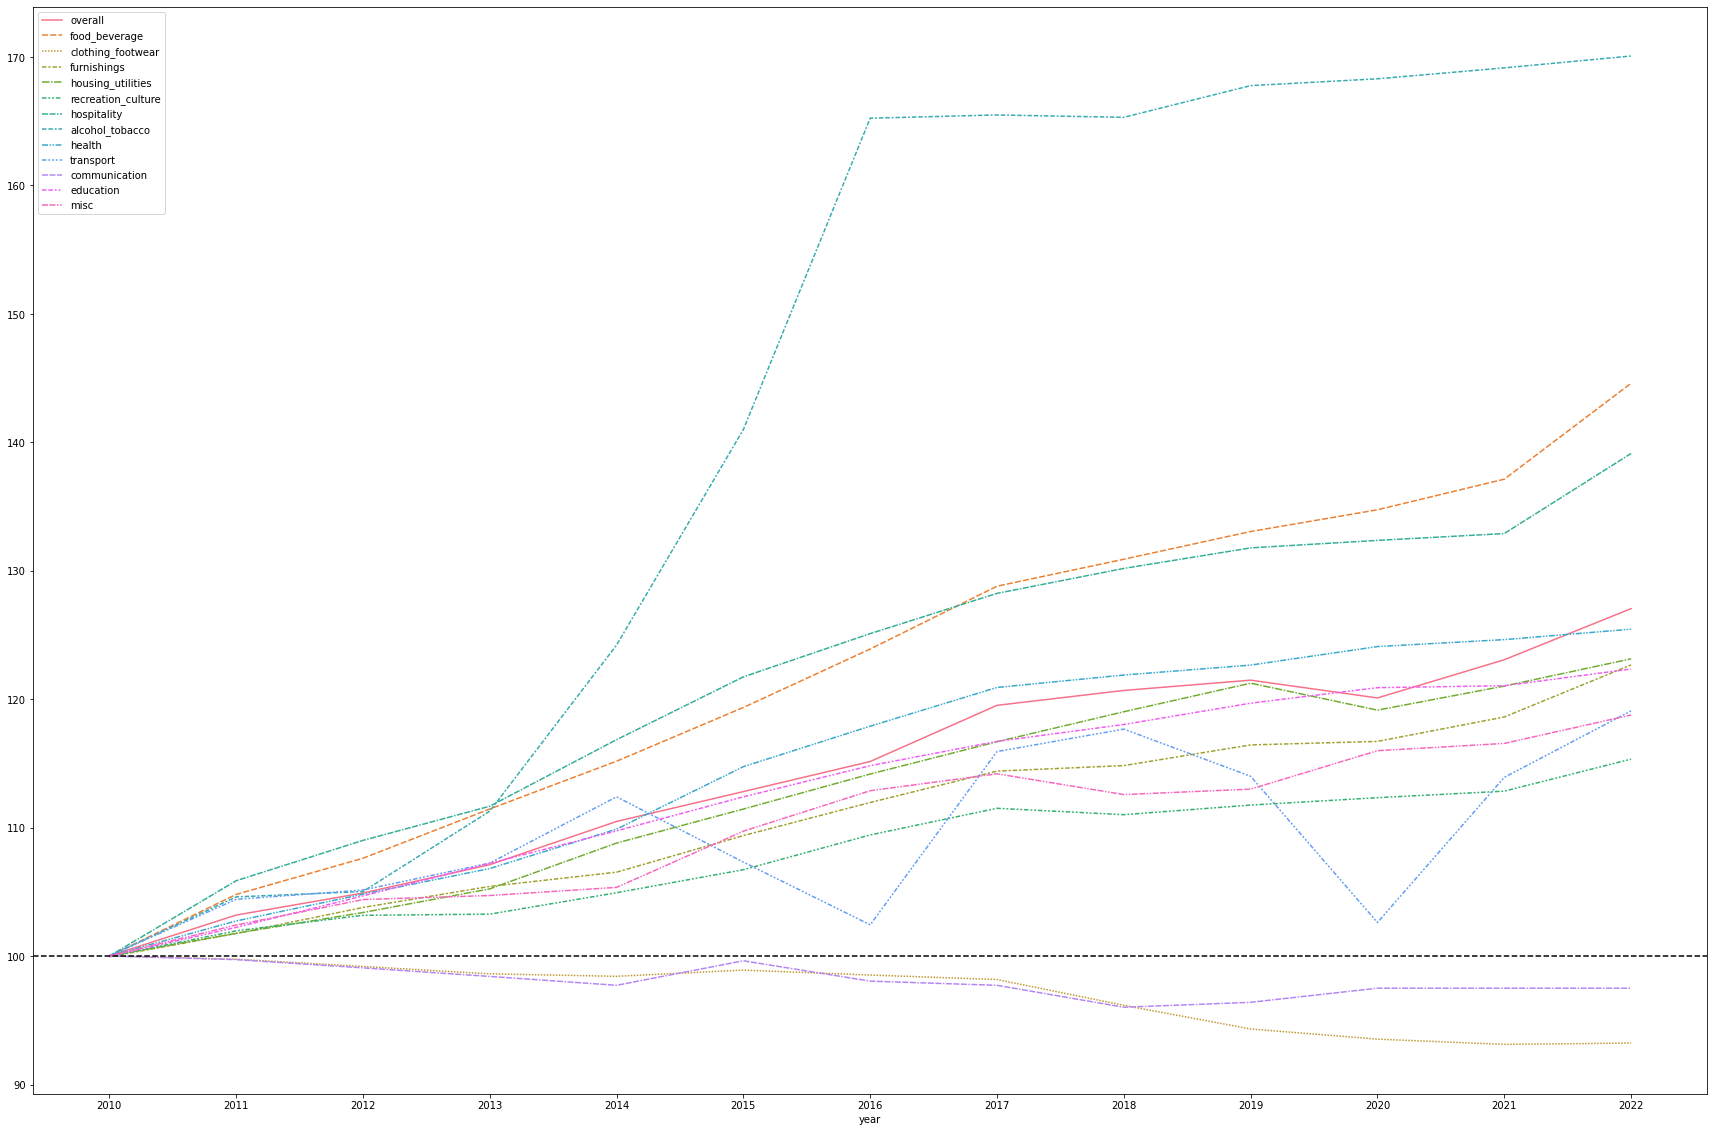

In [7]:
dims = (30, 20)
fig, axes = plt.subplots(figsize = dims)

sns.lineplot(data = df_new, ax = axes)
axes.axhline(y = 100, color = 'k', linestyle = '--')

In [11]:
(df_new.style.highlight_max(color="#A5191E").highlight_min(color="#356518"))

,overall,food_beverage,clothing_footwear,furnishings,housing_utilities,recreation_culture,hospitality,alcohol_tobacco,health,transport,communication,education,misc
year,,,,,,,,,,,,,
2010,100.016667,99.991667,100.008333,99.941667,100.008333,99.983333,100.000000,100.000000,100.016667,100.016667,100.008333,100.000000,100.016667
2011,103.191667,104.800000,99.758333,101.758333,101.775000,101.966667,105.866667,104.608333,102.733333,104.416667,99.725000,102.233333,102.416667
2012,104.908333,107.616667,99.191667,103.783333,103.391667,103.175000,109.008333,105.025000,104.816667,105.141667,99.083333,104.683333,104.400000
2013,107.116667,111.450000,98.616667,105.425000,105.233333,103.266667,111.666667,111.283333,106.816667,107.241667,98.416667,107.225000,104.716667
2014,110.483333,115.175000,98.425000,106.533333,108.800000,104.933333,116.850000,124.216667,109.883333,112.400000,97.725000,109.750000,105.350000
2015,112.808333,119.358333,98.908333,109.383333,111.450000,106.725000,121.741667,141.000000,114.750000,107.316667,99.633333,112.400000,109.725000
2016,115.150000,123.908333,98.525000,111.958333,114.175000,109.433333,125.108333,165.241667,117.900000,102.433333,98.050000,114.825000,112.875000
2017,119.525000,128.800000,98.175000,114.400000,116.691667,111.508333,128.241667,165.491667,120.916667,115.925000,97.725000,116.716667,114.191667
2018,120.683333,130.900000,96.166667,114.833333,119.025000,111.008333,130.183333,165.308333,121.883333,117.675000,96.016667,118.033333,112.575000
